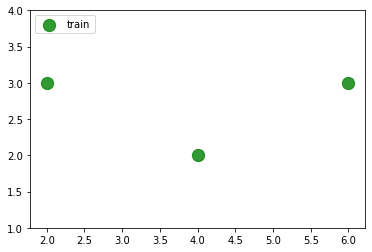

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([[2.0],[4.0],[6.0]])
y = torch.tensor([[3.0],[2.0],[3.0]])

plt.scatter(x.numpy(), y.numpy(), c='g', s=150, alpha=0.8, label='train')
plt.legend(loc='upper left')
# plt.ylim установим y-пределы текущих осей.
plt.ylim((1, 4))
plt.show()
